# Backtest multiple models
Loads valuation model(s) and applies error handling to rank sectors and trade

In [230]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras import layers
import pandas_datareader as pdr
from datetime import datetime
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import itertools
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

from scipy.stats.mstats import gmean


In [2]:

NUM_INPUT_NEURONS = 64
NUM_OUTPUT_NEURONS = 1
DAY_OFFSET = 5

def from_network(symbol):
    return pdr.get_data_yahoo(symbols=symbol, start=datetime(1900, 1, 1)).sort_values(by=['Date'],ascending=False)

# Create features (only close price for now)
def convert_to_percentage(old, new):
    return (old - new) / old

def convert_labels_to_category(labels): 
    # Simplification - If positive return, 1, else 0
    # return map(lambda arr: 1 if arr[0] > 1 else 0, labels)
    # rounding simpliciation
    return map(lambda arr: map(lambda val: round(val,4),arr), labels)

def convert_to_train(raw_dataset, offset=5):
    dataset = raw_dataset.copy()
    features = []
    labels = []
    for i in range(offset, len(dataset) - NUM_INPUT_NEURONS):

        feature_dataset = dataset[i:i+NUM_INPUT_NEURONS].copy()
        latest_close = feature_dataset['Close'].iloc[0]
        
        features.append(
            feature_dataset['Close']
                .map(lambda current: convert_to_percentage(latest_close, current))
                .tolist()
        )
        labels.append([
            dataset['Close'].iloc[i-1] / latest_close, # 1 day trade
        ])
        
    # Without converting labels the precision is hard to determine accuracy. 
    # Rather than crude 0/1, maybe this can be more sophisticated
    labels = convert_labels_to_category(labels)
    
    return [features,labels]

def split_data(symbol):
    fetched = from_network(symbol)
    converted = convert_to_train(fetched)
    features = converted[0]
    labels = converted[1]
    training = [ # since we decide a model, use all data for training
        features[1:],
        labels[1:]
    ]
    validation = [
        features[5:1000],
        labels[5:1000]
    ]
    prediction = [
        features[:5],
        labels[:5],
    ]
    
    return {
        'symbol': symbol,
        'prediction': prediction,
        'validation': validation,
        'training': training,
    }

    
def combine_all(accum, prep):
    return {   
        'prediction':[
            accum['prediction'][0] + prep['prediction'][0],
            accum['prediction'][1] + prep['prediction'][1],
        ],
        'validation':[
            accum['validation'][0] + prep['validation'][0],
            accum['validation'][1] + prep['validation'][1],
        ],
        'training':[
            accum['training'][0] + prep['training'][0],
            accum['training'][1] + prep['training'][1],
        ],
    }


In [3]:
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
    error_model = load_model('sector_model_error.h5')
    model = load_model('sector_model.h5')
    model_0 = load_model('sector_model_0.h5')
    model_1 = load_model('sector_model_1.h5')
    model_2 = load_model('sector_model_2.h5')
    model_3 = load_model('sector_model_3.h5')
    model_4 = load_model('sector_model_4.h5')
    model_5 = load_model('sector_model_5.h5')
    model_6 = load_model('sector_model_6.h5')
    model_7 = load_model('sector_model_7.h5')
    model_8 = load_model('sector_model_8.h5')
    model_9 = load_model('sector_model_9.h5')


In [4]:

QQQ = from_network('QQQ')
SPY = from_network('SPY')
XLK = from_network('XLK')
XLF = from_network('XLF')
XLE = from_network('XLE')
XLP = from_network('XLP')
XLV = from_network('XLV')
XLY = from_network('XLY')
XLI = from_network('XLI')
XLU = from_network('XLU')
DIA = from_network('DIA')
IWM = from_network('IWM')

In [5]:
securities_to_predict = [
    ['SPY', np.array(convert_to_train(SPY.copy(), 0)[0][:1])],
#     ['QQQ', np.array(convert_to_train(QQQ.copy(), 0)[0][:1])],
    ['XLE', np.array(convert_to_train(XLE.copy(), 0)[0][:1])],
    ['XLF', np.array(convert_to_train(XLF.copy(), 0)[0][:1])],
    ['XLK', np.array(convert_to_train(XLK.copy(), 0)[0][:1])],
    ['XLP', np.array(convert_to_train(XLP.copy(), 0)[0][:1])],
    ['XLV', np.array(convert_to_train(XLV.copy(), 0)[0][:1])],
    ['XLU', np.array(convert_to_train(XLU.copy(), 0)[0][:1])],
    ['XLY', np.array(convert_to_train(XLY.copy(), 0)[0][:1])],
    ['XLI', np.array(convert_to_train(XLI.copy(), 0)[0][:1])],
#     ['IWM', np.array(convert_to_train(IWM.copy(), 0)[0][:1])],
#     ['DIA', np.array(convert_to_train(DIA.copy(), 0)[0][:1])],

]


In [33]:
map(generate_model_predictions,[model, model_1, model_2, model_3, model_4,model_5,model_6,model_7,model_8,model_9,model_0])

['XLK', 'XLE', 'XLP', 'XLY', 'SPY', 'XLV', 'XLF', 'XLI', 'XLU']
['XLK', 'XLI', 'XLF', 'XLY', 'SPY', 'XLU', 'XLE', 'XLV', 'XLP']
['XLE', 'XLK', 'XLU', 'XLP', 'XLI', 'XLV', 'SPY', 'XLF', 'XLY']
['XLI', 'XLY', 'XLV', 'XLE', 'XLP', 'SPY', 'XLU', 'XLK', 'XLF']
['XLE', 'XLY', 'XLK', 'XLI', 'XLU', 'XLV', 'SPY', 'XLP', 'XLF']
['XLU', 'XLP', 'XLV', 'XLI', 'SPY', 'XLF', 'XLK', 'XLY', 'XLE']
['XLE', 'XLK', 'XLP', 'XLF', 'XLV', 'XLU', 'XLY', 'XLI', 'SPY']
['XLY', 'XLP', 'XLI', 'SPY', 'XLU', 'XLF', 'XLV', 'XLK', 'XLE']
['SPY', 'XLI', 'XLF', 'XLK', 'XLY', 'XLV', 'XLP', 'XLE', 'XLU']
['XLE', 'XLP', 'XLK', 'XLV', 'XLY', 'SPY', 'XLU', 'XLF', 'XLI']
['XLK', 'XLI', 'XLF', 'XLY', 'SPY', 'XLP', 'XLU', 'XLE', 'XLV']


[None, None, None, None, None, None, None, None, None, None, None]

In [47]:
SPY_TRAIN = convert_to_train(SPY.copy(), 0)
XLE_TRAIN = convert_to_train(XLE.copy(), 0)
XLF_TRAIN = convert_to_train(XLF.copy(), 0)
XLK_TRAIN = convert_to_train(XLK.copy(), 0)
XLP_TRAIN = convert_to_train(XLP.copy(), 0)
XLV_TRAIN = convert_to_train(XLV.copy(), 0)
XLU_TRAIN = convert_to_train(XLU.copy(), 0)
XLY_TRAIN = convert_to_train(XLY.copy(), 0)
XLI_TRAIN = convert_to_train(XLI.copy(), 0)


```
Perhaps creating a policy which takes the aggregate score 0-1 to create a normalized ranking for an item and trading it as a softmax of the portfolio?
```

In [327]:
records = []
account = 1
leverage = 1
for x, y in zip(range(5,300), itertools.count()):
    securities_to_predict = [
#         ['SPY', np.array(SPY_TRAIN[0][x:x+1]),np.array(SPY_TRAIN[1][x:x+1])],
        ['XLE', np.array(XLE_TRAIN[0][x:x+1]),np.array(XLE_TRAIN[1][x:x+1])],
        ['XLF', np.array(XLF_TRAIN[0][x:x+1]),np.array(XLF_TRAIN[1][x:x+1])],
        ['XLK', np.array(XLK_TRAIN[0][x:x+1]),np.array(XLK_TRAIN[1][x:x+1])],
        ['XLP', np.array(XLP_TRAIN[0][x:x+1]),np.array(XLP_TRAIN[1][x:x+1])],
        ['XLV', np.array(XLV_TRAIN[0][x:x+1]),np.array(XLV_TRAIN[1][x:x+1])],
        ['XLU', np.array(XLU_TRAIN[0][x:x+1]),np.array(XLU_TRAIN[1][x:x+1])],
        ['XLY', np.array(XLY_TRAIN[0][x:x+1]),np.array(XLY_TRAIN[1][x:x+1])],
        ['XLI', np.array(XLI_TRAIN[0][x:x+1]),np.array(XLI_TRAIN[1][x:x+1])],
    ]

    def print_arg(arr):
        print '{} {}'.format(arr[0],str(arr[1]))


    def predict_and_correct(model, inputs):
        prediction = model.predict(inputs)
        return prediction

    def generate_model_predictions(model):
        predictions = map(lambda arr: [arr[0], predict_and_correct(model,arr[1])], securities_to_predict)
        predictions.sort(key=lambda x: x[1],reverse=True)
#         print map(print_arg, predictions)
#         print map(lambda arr: arr[0],predictions)
        return predictions
    
    all_model_predictions = map(generate_model_predictions,[model, model_1, model_2, model_3, model_4,model_5,model_6,model_7,model_8,model_9,model_0])

    def ranking_for_symbol(symbol):
        return map(lambda predictions: map(lambda arr: arr[0],predictions).index(symbol),all_model_predictions)

    securities_to_predict.sort(key=lambda x: np.median(ranking_for_symbol(x[0])))

    
    buy_ranking = map(lambda x: x[2],
                      filter(lambda x: np.median(ranking_for_symbol(x[0])) <= 2, securities_to_predict[:4]))
    buy = np.mean(buy_ranking) # long
    
    sell_ranking = map(lambda x: x[2],
                            filter(lambda x: np.median(ranking_for_symbol(x[0])) >= 5, securities_to_predict[4:]))
    sell = 1+(1-np.mean(sell_ranking)) # short
    
    buy = buy if not np.isnan(buy) and len(buy_ranking) > 0 and len(sell_ranking) > 0 else 1
    sell = sell if not np.isnan(sell) and len(buy_ranking) > 0 and len(sell_ranking) > 0 else 1


    change = ((buy + sell) / 2) - 1
    if change != 0:
        print 'result ranking'
        print map(lambda x: x[0],securities_to_predict)
        for security in securities_to_predict:
            print security[0],security[2],np.median(ranking_for_symbol(security[0])),ranking_for_symbol(security[0])
        print 'Buy',buy
        print 'Sell',sell
        print 'Change', change
    account = account + (change*leverage)
    records.append(account)
    print 'Account', account
print 'End Account', account



Account 1
Account 1
result ranking
['XLF', 'XLK', 'XLY', 'XLP', 'XLV', 'XLU', 'XLI', 'XLE']
XLF [[0.9996]] 2.0 [2, 1, 2, 0, 0, 1, 7, 7, 5, 2, 6]
XLK [[0.9837]] 2.0 [0, 2, 7, 2, 6, 0, 4, 2, 0, 6, 7]
XLY [[0.9918]] 3.0 [1, 3, 1, 5, 3, 2, 0, 6, 7, 3, 5]
XLP [[1.0002]] 4.0 [6, 4, 5, 1, 5, 3, 3, 0, 2, 4, 4]
XLV [[0.9977]] 4.0 [7, 5, 3, 6, 1, 6, 2, 4, 3, 5, 1]
XLU [[0.9998]] 4.0 [4, 7, 6, 3, 4, 5, 1, 1, 4, 7, 3]
XLI [[0.9936]] 4.0 [5, 0, 4, 4, 2, 4, 5, 3, 6, 0, 2]
XLE [[0.9856]] 5.0 [3, 6, 0, 7, 7, 7, 6, 5, 1, 1, 0]
Buy 0.99165
Sell 1.0144
Change 0.0030250000000000554
Account 1.003025
result ranking
['XLP', 'XLK', 'XLY', 'XLE', 'XLF', 'XLV', 'XLU', 'XLI']
XLP [[0.9965]] 2.0 [5, 2, 4, 5, 1, 1, 1, 2, 1, 6, 2]
XLK [[0.9949]] 3.0 [1, 3, 6, 3, 7, 0, 3, 1, 0, 1, 7]
XLY [[0.9864]] 3.0 [0, 1, 5, 1, 3, 3, 0, 4, 5, 7, 3]
XLE [[0.9774]] 4.0 [2, 7, 1, 0, 6, 4, 6, 7, 2, 0, 4]
XLF [[0.9773]] 4.0 [4, 4, 3, 4, 5, 2, 7, 6, 6, 2, 5]
XLV [[1.0013]] 4.0 [6, 0, 2, 6, 0, 5, 4, 3, 4, 5, 1]
XLU [[1.0102]] 4.0 [7, 6

result ranking
['XLP', 'XLU', 'XLF', 'XLE', 'XLY', 'XLI', 'XLK', 'XLV']
XLP [[1.0124]] 2.0 [0, 2, 2, 1, 4, 2, 2, 3, 1, 3, 5]
XLU [[1.007]] 2.0 [1, 0, 7, 2, 6, 3, 5, 1, 2, 2, 2]
XLF [[1.0079]] 3.0 [3, 4, 0, 0, 5, 5, 3, 4, 3, 5, 0]
XLE [[1.004]] 4.0 [2, 3, 5, 4, 2, 4, 4, 7, 5, 0, 7]
XLY [[1.0087]] 4.0 [7, 5, 4, 3, 3, 0, 1, 5, 6, 7, 3]
XLI [[1.0056]] 4.0 [6, 6, 1, 6, 1, 6, 6, 0, 0, 4, 1]
XLK [[1.0077]] 5.0 [5, 7, 3, 5, 0, 1, 0, 6, 7, 6, 4]
XLV [[1.0085]] 6.0 [4, 1, 6, 7, 7, 7, 7, 2, 4, 1, 6]
Buy 1.0097
Sell 0.9919
Change 0.0007999999999999119
Account 1.0085250000000001
result ranking
['XLP', 'XLU', 'XLE', 'XLF', 'XLV', 'XLY', 'XLI', 'XLK']
XLP [[1.0087]] 1.0 [1, 5, 6, 1, 1, 1, 1, 3, 0, 0, 4]
XLU [[1.0136]] 2.0 [0, 1, 7, 3, 2, 5, 6, 2, 1, 1, 2]
XLE [[0.984]] 3.0 [3, 3, 4, 4, 0, 2, 3, 4, 5, 3, 7]
XLF [[0.9975]] 3.0 [4, 7, 0, 0, 3, 3, 5, 6, 3, 5, 1]
XLV [[1.0054]] 4.0 [2, 0, 2, 6, 7, 7, 4, 1, 4, 2, 6]
XLY [[1.0022]] 4.0 [7, 6, 3, 2, 4, 0, 2, 5, 7, 7, 3]
XLI [[0.9987]] 4.0 [6, 4, 5, 7, 5, 4, 

result ranking
['XLK', 'XLY', 'XLE', 'XLI', 'XLP', 'XLF', 'XLV', 'XLU']
XLK [[1.0186]] 1.0 [0, 7, 4, 1, 1, 0, 3, 3, 7, 0, 0]
XLY [[1.0145]] 2.0 [1, 5, 7, 0, 2, 1, 4, 1, 2, 2, 1]
XLE [[1.0046]] 3.0 [3, 0, 0, 5, 0, 6, 2, 0, 3, 3, 3]
XLI [[1.008]] 3.0 [2, 2, 6, 4, 3, 5, 1, 4, 0, 4, 2]
XLP [[1.0096]] 4.0 [4, 4, 2, 3, 4, 4, 6, 2, 5, 7, 7]
XLF [[0.9985]] 5.0 [5, 1, 5, 6, 7, 7, 5, 5, 6, 1, 5]
XLV [[1.0104]] 5.0 [7, 3, 3, 7, 5, 2, 7, 6, 4, 5, 4]
XLU [[0.9926]] 6.0 [6, 6, 1, 2, 6, 3, 0, 7, 1, 6, 6]
Buy 1.01655
Sell 0.9995
Change 0.008024999999999949
Account 1.0368416666666664
result ranking
['XLV', 'XLY', 'XLE', 'XLP', 'XLU', 'XLI', 'XLF', 'XLK']
XLV [[1.0051]] 2.0 [7, 2, 7, 7, 3, 1, 1, 6, 0, 1, 0]
XLY [[1.0051]] 2.0 [2, 5, 6, 0, 4, 2, 2, 5, 2, 4, 1]
XLE [[1.0185]] 3.0 [5, 1, 3, 3, 0, 5, 4, 0, 5, 2, 7]
XLP [[1.0104]] 3.0 [4, 0, 2, 2, 2, 3, 3, 1, 3, 5, 4]
XLU [[1.0062]] 4.0 [6, 3, 1, 4, 1, 4, 0, 7, 1, 7, 6]
XLI [[1.0017]] 4.0 [1, 6, 4, 6, 6, 6, 6, 3, 4, 0, 2]
XLF [[1.0037]] 5.0 [3, 4, 0, 5, 7, 7

result ranking
['XLF', 'XLY', 'XLE', 'XLK', 'XLP', 'XLV', 'XLU', 'XLI']
XLF [[1.0079]] 1.0 [1, 2, 1, 0, 0, 4, 0, 5, 4, 7, 0]
XLY [[1.0101]] 2.0 [0, 1, 2, 2, 2, 7, 6, 4, 1, 2, 2]
XLE [[1.0122]] 3.0 [4, 3, 4, 1, 3, 0, 2, 3, 3, 4, 6]
XLK [[1.0161]] 3.0 [2, 7, 0, 5, 1, 6, 3, 2, 0, 3, 5]
XLP [[1.0048]] 4.0 [5, 5, 3, 3, 4, 2, 4, 6, 6, 6, 3]
XLV [[1.005]] 5.0 [7, 0, 7, 6, 5, 1, 7, 1, 5, 0, 7]
XLU [[0.9933]] 5.0 [6, 6, 5, 4, 6, 3, 5, 0, 7, 1, 4]
XLI [[1.0104]] 5.0 [3, 4, 6, 7, 7, 5, 1, 7, 2, 5, 1]
Buy 1.009
Sell 0.9970999999999999
Change 0.003049999999999997
Account 1.0398499999999995
result ranking
['XLK', 'XLY', 'XLF', 'XLI', 'XLE', 'XLP', 'XLU', 'XLV']
XLK [[0.9623]] 1.0 [1, 0, 4, 0, 2, 6, 0, 0, 2, 1, 6]
XLY [[0.9702]] 2.0 [4, 1, 0, 2, 0, 2, 2, 2, 1, 6, 4]
XLF [[0.9709]] 3.0 [3, 2, 1, 5, 7, 1, 1, 5, 3, 7, 2]
XLI [[0.9715]] 3.0 [0, 4, 2, 1, 3, 4, 3, 4, 5, 0, 3]
XLE [[0.9828]] 4.0 [5, 6, 7, 3, 4, 3, 4, 7, 0, 2, 5]
XLP [[0.9906]] 5.0 [6, 3, 3, 6, 1, 5, 5, 6, 4, 5, 1]
XLU [[1.0107]] 5.0 [2, 5, 

XLP [[1.0009]] 4.0 [2, 5, 1, 4, 1, 4, 4, 6, 6, 5, 7]
XLY [[0.9997]] 4.0 [6, 3, 6, 6, 3, 6, 6, 4, 1, 4, 2]
XLK [[1.0028]] 6.0 [7, 6, 5, 5, 6, 1, 7, 2, 7, 6, 6]
Buy 1.00105
Sell 0.9972000000000001
Change -0.0008749999999999591
Account 1.0411583333333334
result ranking
['XLI', 'XLP', 'XLV', 'XLU', 'XLE', 'XLF', 'XLK', 'XLY']
XLI [[1.0013]] 2.0 [2, 1, 0, 1, 6, 6, 1, 2, 5, 2, 0]
XLP [[1.005]] 3.0 [3, 5, 1, 3, 1, 2, 2, 6, 6, 6, 4]
XLV [[0.9712]] 3.0 [7, 0, 3, 6, 0, 0, 7, 0, 4, 7, 2]
XLU [[0.9962]] 3.0 [0, 2, 2, 7, 4, 3, 0, 4, 1, 3, 5]
XLE [[0.9987]] 4.0 [1, 3, 4, 2, 5, 5, 6, 5, 3, 5, 1]
XLF [[1.0026]] 4.0 [4, 6, 6, 0, 3, 4, 4, 7, 2, 4, 3]
XLK [[1.0056]] 5.0 [5, 7, 7, 4, 7, 1, 3, 3, 7, 0, 7]
XLY [[1.0019]] 5.0 [6, 4, 5, 5, 2, 7, 5, 1, 0, 1, 6]
Buy 1.0013
Sell 0.9962499999999999
Change -0.0012250000000000316
Account 1.0399333333333334
result ranking
['XLU', 'XLI', 'XLF', 'XLK', 'XLE', 'XLV', 'XLY', 'XLP']
XLU [[0.9876]] 2.0 [1, 2, 2, 7, 6, 0, 1, 7, 1, 4, 7]
XLI [[1.0061]] 2.0 [5, 3, 0, 2, 2, 5

XLI [[1.0011]] 2.0 [0, 7, 2, 7, 0, 6, 0, 2, 1, 0, 3]
XLE [[0.9929]] 3.0 [5, 0, 0, 6, 1, 0, 3, 0, 6, 5, 5]
XLF [[0.9957]] 3.0 [1, 2, 7, 0, 7, 3, 2, 5, 0, 3, 7]
XLV [[0.9917]] 3.0 [2, 3, 5, 4, 6, 2, 5, 3, 4, 1, 2]
XLK [[0.9943]] 4.0 [7, 4, 3, 3, 2, 4, 4, 6, 7, 2, 6]
XLU [[0.993]] 4.0 [4, 6, 4, 1, 5, 7, 1, 1, 2, 4, 0]
XLY [[0.998]] 4.0 [6, 1, 1, 5, 4, 1, 7, 4, 5, 7, 4]
XLP [[0.9966]] 5.0 [3, 5, 6, 2, 3, 5, 6, 7, 3, 6, 1]
Buy 1.0011
Sell 1.0034
Change 0.0022500000000000853
Account 1.0318166666666668
result ranking
['XLI', 'XLE', 'XLF', 'XLP', 'XLV', 'XLU', 'XLY', 'XLK']
XLI [[1.0067]] 1.0 [0, 7, 5, 7, 0, 2, 0, 6, 1, 0, 0]
XLE [[1.0144]] 3.0 [1, 1, 3, 5, 5, 0, 5, 0, 5, 5, 3]
XLF [[1.0119]] 3.0 [7, 0, 4, 0, 3, 7, 2, 3, 0, 3, 7]
XLP [[1.0085]] 4.0 [4, 4, 1, 2, 1, 6, 4, 1, 4, 4, 2]
XLV [[1.0068]] 4.0 [3, 3, 6, 4, 7, 5, 3, 4, 3, 2, 4]
XLU [[1.0072]] 4.0 [2, 5, 7, 1, 6, 4, 1, 5, 2, 6, 1]
XLY [[1.0043]] 5.0 [5, 2, 0, 6, 2, 1, 6, 2, 6, 7, 5]
XLK [[1.0055]] 6.0 [6, 6, 2, 3, 4, 3, 7, 7, 7, 1, 6]
Buy

result ranking
['XLV', 'XLE', 'XLK', 'XLI', 'XLP', 'XLU', 'XLF', 'XLY']
XLV [[0.9864]] 1.0 [0, 0, 1, 3, 1, 1, 5, 3, 0, 5, 1]
XLE [[1.0018]] 3.0 [3, 7, 0, 4, 0, 0, 7, 2, 2, 3, 4]
XLK [[0.9962]] 3.0 [7, 1, 5, 0, 3, 4, 3, 7, 3, 1, 5]
XLI [[0.9956]] 3.0 [6, 5, 6, 1, 5, 3, 0, 1, 6, 0, 3]
XLP [[0.9983]] 4.0 [2, 6, 3, 2, 4, 6, 4, 0, 7, 6, 2]
XLU [[1.0018]] 4.0 [4, 2, 4, 5, 2, 7, 1, 4, 1, 7, 0]
XLF [[0.9936]] 5.0 [1, 3, 2, 7, 7, 2, 6, 5, 5, 4, 6]
XLY [[0.9968]] 5.0 [5, 4, 7, 6, 6, 5, 2, 6, 4, 2, 7]
Buy 0.9864
Sell 1.0048
Change -0.0043999999999999595
Account 1.0090916666666667
result ranking
['XLV', 'XLE', 'XLF', 'XLP', 'XLU', 'XLK', 'XLY', 'XLI']
XLV [[1.0142]] 2.0 [2, 5, 1, 1, 2, 2, 0, 5, 2, 7, 2]
XLE [[1.0184]] 3.0 [0, 4, 0, 3, 0, 3, 4, 4, 4, 5, 0]
XLF [[1.0064]] 3.0 [1, 0, 2, 7, 7, 1, 6, 3, 6, 2, 6]
XLP [[0.9982]] 3.0 [3, 7, 3, 0, 3, 6, 3, 6, 3, 3, 1]
XLU [[1.0021]] 3.0 [5, 1, 7, 2, 1, 7, 2, 7, 0, 6, 3]
XLK [[1.0068]] 4.0 [7, 2, 6, 5, 4, 4, 7, 1, 1, 1, 5]
XLY [[1.0081]] 4.0 [4, 6, 4, 6, 6,

result ranking
['XLP', 'XLF', 'XLV', 'XLU', 'XLY', 'XLE', 'XLK', 'XLI']
XLP [[1.0002]] 1.0 [4, 0, 6, 2, 1, 0, 1, 4, 0, 0, 4]
XLF [[0.9989]] 2.0 [6, 2, 1, 3, 0, 2, 4, 2, 1, 6, 6]
XLV [[1.0045]] 3.0 [5, 5, 2, 1, 3, 1, 3, 3, 4, 2, 7]
XLU [[0.9995]] 3.0 [7, 3, 0, 0, 5, 3, 0, 1, 3, 4, 2]
XLY [[0.9959]] 4.0 [0, 1, 7, 4, 6, 7, 6, 0, 7, 3, 3]
XLE [[0.9926]] 5.0 [2, 6, 3, 5, 2, 5, 7, 7, 5, 1, 1]
XLK [[1.0034]] 5.0 [3, 7, 5, 7, 4, 4, 5, 6, 2, 5, 5]
XLI [[1.0003]] 5.0 [1, 4, 4, 6, 7, 6, 2, 5, 6, 7, 0]
Buy 0.9995499999999999
Sell 1.0012333333333334
Change 0.00039166666666679006
Account 1.0082000000000007
result ranking
['XLV', 'XLF', 'XLP', 'XLU', 'XLK', 'XLY', 'XLE', 'XLI']
XLV [[0.9986]] 2.0 [6, 5, 4, 1, 2, 0, 1, 6, 1, 1, 6]
XLF [[0.9973]] 3.0 [2, 3, 0, 5, 1, 2, 4, 2, 7, 5, 3]
XLP [[1.0002]] 3.0 [3, 0, 7, 2, 3, 4, 3, 7, 0, 3, 1]
XLU [[1.002]] 3.0 [7, 2, 3, 0, 4, 6, 0, 4, 3, 7, 0]
XLK [[1.0084]] 4.0 [5, 4, 1, 6, 7, 3, 7, 1, 2, 2, 7]
XLY [[1.0094]] 4.0 [0, 1, 6, 4, 6, 5, 5, 0, 4, 4, 4]
XLE [[1.001

result ranking
['XLE', 'XLI', 'XLP', 'XLF', 'XLK', 'XLV', 'XLU', 'XLY']
XLE [[0.9941]] 1.0 [0, 1, 1, 2, 7, 6, 1, 1, 3, 6, 0]
XLI [[0.999]] 2.0 [1, 2, 5, 3, 3, 2, 0, 0, 1, 5, 4]
XLP [[1.0029]] 3.0 [3, 5, 2, 1, 4, 1, 5, 7, 6, 2, 1]
XLF [[1.0025]] 4.0 [5, 0, 6, 7, 6, 5, 3, 3, 4, 3, 3]
XLK [[0.9981]] 4.0 [7, 4, 3, 4, 5, 0, 4, 4, 0, 4, 2]
XLV [[1.0033]] 4.0 [2, 6, 4, 5, 1, 3, 2, 5, 7, 1, 5]
XLU [[0.9963]] 4.0 [4, 7, 0, 6, 2, 4, 7, 2, 5, 0, 6]
XLY [[1.001]] 6.0 [6, 3, 7, 0, 0, 7, 6, 6, 2, 7, 7]
Buy 0.99655
Sell 0.9990000000000001
Change -0.0022249999999999215
Account 1.0063416666666676
result ranking
['XLE', 'XLK', 'XLV', 'XLU', 'XLF', 'XLP', 'XLI', 'XLY']
XLE [[1.0029]] 2.0 [0, 4, 7, 5, 0, 6, 0, 1, 2, 3, 0]
XLK [[1.0044]] 3.0 [3, 1, 4, 1, 7, 7, 1, 4, 0, 4, 1]
XLV [[1.0019]] 3.0 [1, 7, 0, 3, 5, 2, 2, 3, 7, 1, 6]
XLU [[1.0131]] 3.0 [6, 2, 1, 7, 3, 1, 7, 6, 3, 0, 5]
XLF [[1.0004]] 4.0 [2, 3, 5, 6, 6, 4, 4, 0, 5, 6, 2]
XLP [[1.0059]] 4.0 [5, 5, 6, 2, 4, 0, 5, 7, 4, 2, 3]
XLI [[1.0136]] 4.0 [4, 

XLV [[0.9869]] 4.0 [7, 1, 4, 4, 3, 7, 3, 7, 5, 1, 2]
XLI [[0.9811]] 4.0 [5, 5, 2, 2, 4, 4, 4, 2, 4, 2, 7]
XLP [[0.9903]] 5.0 [6, 4, 1, 1, 7, 6, 5, 4, 1, 7, 5]
XLY [[0.9802]] 6.0 [3, 7, 7, 6, 2, 5, 1, 1, 7, 6, 6]
Buy 0.98785
Sell 1.01475
Change 0.0013000000000000789
Account 1.0640750000000005
result ranking
['XLE', 'XLK', 'XLF', 'XLV', 'XLU', 'XLI', 'XLY', 'XLP']
XLE [[0.9764]] 2.0 [4, 1, 5, 0, 1, 0, 2, 0, 6, 5, 2]
XLK [[1.0079]] 2.0 [6, 0, 7, 2, 2, 4, 1, 1, 5, 2, 1]
XLF [[0.9962]] 3.0 [1, 2, 3, 1, 6, 3, 6, 7, 0, 6, 5]
XLV [[0.9913]] 3.0 [5, 3, 2, 4, 5, 2, 3, 6, 4, 0, 0]
XLU [[0.9933]] 3.0 [0, 6, 1, 6, 3, 1, 7, 5, 2, 3, 7]
XLI [[1.005]] 3.0 [2, 4, 6, 3, 0, 7, 4, 2, 1, 1, 4]
XLY [[1.0078]] 4.0 [7, 5, 4, 5, 4, 6, 0, 3, 3, 4, 3]
XLP [[0.9882]] 6.0 [3, 7, 0, 7, 7, 5, 5, 4, 7, 7, 6]
Buy 0.9921500000000001
Sell 1.0118
Change 0.00197500000000006
Account 1.0660500000000006
result ranking
['XLE', 'XLF', 'XLP', 'XLK', 'XLV', 'XLU', 'XLI', 'XLY']
XLE [[0.9818]] 2.0 [5, 6, 6, 2, 0, 0, 0, 0, 2, 3, 3

result ranking
['XLP', 'XLK', 'XLV', 'XLY', 'XLU', 'XLI', 'XLE', 'XLF']
XLP [[1.0089]] 1.0 [3, 3, 0, 1, 1, 4, 1, 7, 1, 0, 3]
XLK [[1.002]] 2.0 [1, 1, 7, 0, 2, 2, 7, 3, 0, 4, 2]
XLV [[1.0104]] 3.0 [5, 2, 3, 4, 0, 5, 0, 4, 3, 3, 7]
XLY [[1.003]] 3.0 [7, 7, 6, 3, 6, 0, 4, 2, 2, 2, 0]
XLU [[1.0075]] 4.0 [6, 4, 1, 5, 4, 6, 6, 5, 4, 1, 4]
XLI [[0.9983]] 4.0 [4, 6, 5, 2, 3, 1, 5, 1, 5, 6, 1]
XLE [[0.9972]] 5.0 [0, 0, 2, 7, 7, 7, 3, 0, 7, 7, 5]
XLF [[1.0008]] 5.0 [2, 5, 4, 6, 5, 3, 2, 6, 6, 5, 6]
Buy 1.00545
Sell 1.0010000000000001
Change 0.0032250000000000334
Account 1.0642000000000005
result ranking
['XLK', 'XLP', 'XLY', 'XLF', 'XLV', 'XLU', 'XLI', 'XLE']
XLK [[1.0226]] 2.0 [0, 2, 4, 2, 0, 5, 6, 2, 7, 0, 0]
XLP [[1.0013]] 3.0 [4, 3, 0, 0, 3, 3, 3, 5, 0, 4, 4]
XLY [[1.0224]] 3.0 [7, 7, 5, 6, 4, 0, 0, 3, 2, 1, 1]
XLF [[1.0204]] 4.0 [5, 6, 2, 4, 2, 1, 2, 4, 4, 5, 5]
XLV [[1.0097]] 4.0 [3, 1, 6, 3, 1, 4, 4, 6, 1, 6, 6]
XLU [[1.0059]] 4.0 [1, 4, 1, 1, 6, 6, 7, 7, 3, 2, 7]
XLI [[1.0073]] 5.0 [6, 5

result ranking
['XLE', 'XLI', 'XLK', 'XLP', 'XLU', 'XLY', 'XLF', 'XLV']
XLE [[1.0061]] 1.0 [0, 0, 7, 1, 2, 1, 2, 5, 0, 0, 7]
XLI [[1.0076]] 2.0 [1, 4, 0, 2, 7, 0, 3, 0, 2, 7, 5]
XLK [[1.0238]] 4.0 [5, 1, 3, 4, 1, 4, 7, 7, 1, 1, 4]
XLP [[0.9906]] 4.0 [4, 7, 4, 6, 5, 7, 0, 1, 3, 3, 2]
XLU [[0.9882]] 4.0 [6, 6, 1, 7, 4, 6, 1, 2, 6, 4, 3]
XLY [[1.0129]] 4.0 [2, 5, 6, 0, 3, 3, 4, 4, 4, 5, 1]
XLF [[1.0139]] 5.0 [3, 2, 5, 3, 0, 5, 6, 3, 5, 6, 6]
XLV [[1.0014]] 5.0 [7, 3, 2, 5, 6, 2, 5, 6, 7, 2, 0]
Buy 1.00685
Sell 0.9923500000000001
Change -0.00039999999999995595
Account 1.1087125000000004
result ranking
['XLE', 'XLK', 'XLI', 'XLV', 'XLF', 'XLY', 'XLP', 'XLU']
XLE [[1.0231]] 0.0 [0, 3, 6, 0, 0, 1, 0, 4, 0, 0, 7]
XLK [[1.0112]] 2.0 [4, 0, 2, 1, 1, 7, 7, 6, 2, 4, 0]
XLI [[1.0206]] 2.0 [1, 2, 0, 2, 4, 0, 3, 0, 1, 7, 5]
XLV [[1.0107]] 3.0 [7, 1, 1, 4, 3, 2, 5, 5, 7, 1, 2]
XLF [[1.0173]] 4.0 [2, 5, 7, 5, 2, 4, 2, 3, 4, 5, 6]
XLY [[1.015]] 4.0 [3, 4, 4, 3, 5, 6, 6, 7, 3, 3, 1]
XLP [[1.0198]] 5.0 [5

result ranking
['XLE', 'XLP', 'XLV', 'XLU', 'XLI', 'XLF', 'XLK', 'XLY']
XLE [[1.0089]] 2.0 [7, 7, 4, 0, 2, 1, 4, 4, 2, 1, 2]
XLP [[0.9978]] 3.0 [3, 4, 0, 1, 3, 3, 6, 1, 5, 3, 4]
XLV [[1.0017]] 3.0 [6, 2, 3, 2, 6, 5, 2, 3, 6, 0, 6]
XLU [[1.0041]] 3.0 [4, 0, 1, 7, 0, 0, 3, 2, 7, 4, 3]
XLI [[0.9846]] 3.0 [1, 3, 5, 4, 1, 2, 1, 7, 3, 2, 5]
XLF [[0.9961]] 5.0 [0, 5, 2, 6, 4, 6, 7, 0, 1, 5, 7]
XLK [[1.0036]] 5.0 [5, 1, 7, 5, 5, 4, 0, 6, 4, 6, 1]
XLY [[0.9971]] 5.0 [2, 6, 6, 3, 7, 7, 5, 5, 0, 7, 0]
Buy 1.0089
Sell 1.0010666666666665
Change 0.0049833333333331176
Account 1.1312375
result ranking
['XLK', 'XLI', 'XLE', 'XLP', 'XLU', 'XLF', 'XLV', 'XLY']
XLK [[0.9887]] 2.0 [2, 0, 7, 6, 1, 6, 2, 6, 3, 2, 1]
XLI [[1.0025]] 2.0 [0, 4, 2, 3, 3, 2, 1, 0, 4, 1, 5]
XLE [[0.9992]] 3.0 [4, 5, 3, 1, 0, 1, 0, 5, 6, 3, 3]
XLP [[1.0138]] 4.0 [3, 1, 0, 0, 4, 4, 5, 4, 1, 7, 6]
XLU [[1.0084]] 4.0 [7, 3, 1, 7, 2, 0, 4, 2, 7, 5, 4]
XLF [[1.0068]] 5.0 [1, 7, 6, 5, 7, 7, 7, 1, 2, 4, 2]
XLV [[0.9996]] 5.0 [5, 6, 5, 2, 

result ranking
['XLF', 'XLY', 'XLP', 'XLE', 'XLK', 'XLV', 'XLI', 'XLU']
XLF [[1.0071]] 2.0 [0, 2, 2, 1, 7, 3, 2, 0, 3, 3, 1]
XLY [[0.9963]] 2.0 [7, 3, 0, 4, 2, 1, 4, 5, 2, 2, 2]
XLP [[0.9973]] 3.0 [1, 1, 4, 3, 1, 5, 0, 2, 6, 7, 3]
XLE [[1.0053]] 4.0 [4, 7, 1, 5, 3, 7, 6, 1, 1, 0, 7]
XLK [[0.9992]] 4.0 [5, 4, 3, 0, 6, 0, 7, 4, 5, 1, 6]
XLV [[0.9967]] 4.0 [6, 6, 6, 2, 4, 4, 3, 6, 0, 4, 4]
XLI [[1.005]] 4.0 [3, 5, 7, 7, 5, 2, 1, 3, 4, 5, 0]
XLU [[0.9947]] 5.0 [2, 0, 5, 6, 0, 6, 5, 7, 7, 6, 5]
Buy 1.0017
Sell 1.0053
Change 0.0035000000000000586
Account 1.1272041666666663
Account 1.1272041666666663
result ranking
['XLV', 'XLY', 'XLF', 'XLK', 'XLP', 'XLI', 'XLU', 'XLE']
XLV [[1.005]] 2.0 [3, 3, 0, 0, 4, 6, 6, 1, 1, 2, 1]
XLY [[1.0019]] 2.0 [7, 1, 5, 2, 2, 1, 2, 6, 4, 3, 2]
XLF [[0.9908]] 3.0 [2, 5, 2, 1, 5, 3, 0, 4, 5, 1, 4]
XLK [[0.9958]] 3.0 [5, 7, 4, 3, 6, 2, 1, 0, 0, 0, 5]
XLP [[1.0116]] 3.0 [1, 2, 6, 6, 1, 5, 3, 3, 3, 5, 0]
XLI [[1.0031]] 3.0 [0, 0, 3, 4, 3, 0, 5, 7, 2, 4, 3]
XLU [[0.99

result ranking
['XLF', 'XLK', 'XLP', 'XLV', 'XLI', 'XLU', 'XLY', 'XLE']
XLF [[1.0032]] 1.0 [1, 4, 1, 1, 6, 1, 4, 1, 7, 6, 0]
XLK [[0.9985]] 3.0 [2, 6, 5, 6, 1, 3, 7, 4, 0, 3, 1]
XLP [[0.9995]] 3.0 [7, 3, 2, 3, 4, 0, 2, 7, 4, 4, 3]
XLV [[1.0033]] 3.0 [5, 2, 4, 4, 5, 2, 3, 5, 2, 0, 2]
XLI [[1.0067]] 3.0 [4, 0, 7, 0, 2, 4, 0, 0, 3, 5, 4]
XLU [[0.9965]] 5.0 [6, 1, 0, 5, 3, 7, 5, 3, 6, 2, 5]
XLY [[1.0071]] 5.0 [3, 5, 3, 7, 7, 5, 6, 2, 1, 1, 6]
XLE [[1.0067]] 6.0 [0, 7, 6, 2, 0, 6, 1, 6, 5, 7, 7]
Buy 1.0032
Sell 0.9965666666666666
Change -0.00011666666666665382
Account 1.1313791666666666
result ranking
['XLF', 'XLI', 'XLK', 'XLV', 'XLE', 'XLP', 'XLU', 'XLY']
XLF [[1.0021]] 2.0 [2, 2, 7, 5, 7, 1, 5, 2, 7, 0, 0]
XLI [[1.0061]] 2.0 [4, 0, 6, 2, 3, 2, 0, 1, 6, 2, 5]
XLK [[1.0015]] 3.0 [7, 6, 2, 1, 1, 3, 6, 4, 0, 6, 1]
XLV [[1.0031]] 3.0 [6, 3, 3, 0, 4, 0, 2, 6, 1, 1, 3]
XLE [[1.0025]] 4.0 [0, 4, 1, 7, 0, 4, 1, 0, 5, 7, 7]
XLP [[1.0077]] 4.0 [1, 5, 4, 4, 2, 6, 4, 5, 3, 4, 2]
XLU [[1.0052]] 4.0 [5

XLU [[0.9939]] 3.0 [4, 3, 6, 3, 7, 3, 7, 0, 0, 5, 2]
XLY [[0.992]] 3.0 [6, 1, 7, 2, 5, 5, 4, 3, 3, 0, 3]
XLI [[0.9901]] 3.0 [0, 2, 0, 0, 3, 6, 1, 4, 7, 7, 5]
XLF [[1.0007]] 4.0 [5, 5, 4, 5, 4, 4, 5, 2, 1, 4, 0]
XLP [[0.9989]] 6.0 [7, 6, 3, 4, 6, 2, 6, 6, 4, 6, 1]
Buy 0.9963
Sell 1.0011
Change -0.0012999999999999678
Account 1.1557499999999998
result ranking
['XLF', 'XLE', 'XLV', 'XLI', 'XLK', 'XLP', 'XLY', 'XLU']
XLF [[1.0021]] 2.0 [0, 7, 0, 1, 3, 1, 2, 0, 4, 7, 2]
XLE [[0.9957]] 3.0 [3, 2, 6, 4, 2, 6, 3, 1, 3, 2, 1]
XLV [[0.9928]] 3.0 [7, 6, 2, 7, 0, 0, 5, 3, 0, 1, 4]
XLI [[1.0001]] 3.0 [1, 4, 3, 0, 1, 5, 0, 2, 5, 6, 3]
XLK [[0.9829]] 4.0 [6, 1, 1, 3, 4, 4, 1, 7, 7, 5, 5]
XLP [[1.0013]] 4.0 [4, 5, 4, 6, 6, 2, 6, 5, 2, 4, 0]
XLY [[0.9974]] 4.0 [5, 0, 5, 2, 5, 3, 4, 6, 1, 0, 6]
XLU [[0.9968]] 6.0 [2, 3, 7, 5, 7, 7, 7, 4, 6, 3, 7]
Buy 1.0021
Sell 1.0032
Change 0.002650000000000041
Account 1.1583999999999999
result ranking
['XLE', 'XLK', 'XLP', 'XLV', 'XLY', 'XLF', 'XLU', 'XLI']
XLE [[1.01

result ranking
['XLF', 'XLE', 'XLK', 'XLY', 'XLV', 'XLI', 'XLP', 'XLU']
XLF [[1.0023]] 2.0 [4, 2, 1, 5, 1, 0, 2, 0, 6, 4, 4]
XLE [[0.9989]] 3.0 [3, 7, 5, 1, 0, 4, 1, 3, 0, 2, 6]
XLK [[1.0141]] 3.0 [0, 3, 0, 3, 3, 5, 3, 5, 7, 0, 1]
XLY [[1.005]] 3.0 [2, 1, 2, 2, 4, 7, 4, 4, 3, 6, 0]
XLV [[1.0104]] 4.0 [6, 5, 7, 4, 2, 6, 6, 2, 1, 3, 3]
XLI [[1.0049]] 4.0 [1, 4, 6, 6, 7, 3, 0, 1, 4, 1, 5]
XLP [[1.0138]] 5.0 [7, 0, 4, 0, 6, 2, 7, 6, 5, 5, 7]
XLU [[1.0053]] 5.0 [5, 6, 3, 7, 5, 1, 5, 7, 2, 7, 2]
Buy 1.0023
Sell 0.99045
Change -0.0036249999999999893
Account 1.1566083333333326
result ranking
['XLE', 'XLK', 'XLP', 'XLY', 'XLI', 'XLV', 'XLF', 'XLU']
XLE [[1.0063]] 1.0 [7, 6, 0, 3, 0, 0, 0, 0, 4, 1, 3]
XLK [[0.9882]] 3.0 [2, 4, 3, 0, 6, 3, 1, 7, 7, 0, 2]
XLP [[1.0023]] 3.0 [5, 0, 5, 2, 2, 1, 6, 3, 3, 5, 4]
XLY [[0.995]] 3.0 [3, 3, 1, 4, 4, 5, 2, 5, 2, 4, 1]
XLI [[0.9968]] 3.0 [0, 2, 2, 5, 3, 6, 3, 1, 5, 3, 7]
XLV [[1.0024]] 4.0 [1, 5, 4, 6, 5, 4, 4, 4, 0, 2, 6]
XLF [[0.991]] 5.0 [4, 1, 6, 1, 1, 7

result ranking
['XLE', 'XLK', 'XLU', 'XLY', 'XLI', 'XLP', 'XLF', 'XLV']
XLE [[0.9981]] 1.0 [6, 7, 0, 0, 0, 3, 0, 3, 1, 5, 0]
XLK [[0.9983]] 3.0 [4, 2, 3, 2, 1, 4, 6, 0, 4, 1, 5]
XLU [[0.9996]] 3.0 [5, 5, 6, 1, 7, 1, 3, 1, 3, 6, 2]
XLY [[1.0021]] 3.0 [7, 1, 4, 3, 3, 6, 7, 4, 0, 2, 3]
XLI [[1.0033]] 3.0 [3, 3, 2, 5, 2, 0, 4, 7, 5, 4, 1]
XLP [[1.0123]] 4.0 [2, 6, 7, 7, 4, 7, 2, 2, 2, 0, 4]
XLF [[1.0014]] 5.0 [0, 4, 5, 4, 6, 2, 5, 6, 6, 7, 7]
XLV [[1.0058]] 5.0 [1, 0, 1, 6, 5, 5, 1, 5, 7, 3, 6]
Buy 0.9981
Sell 0.9964
Change -0.00275000000000003
Account 1.1578666666666657
result ranking
['XLE', 'XLK', 'XLU', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF']
XLE [[1.0152]] 1.0 [1, 7, 1, 0, 0, 0, 0, 1, 0, 7, 2]
XLK [[0.992]] 3.0 [7, 2, 2, 5, 1, 2, 7, 0, 3, 3, 4]
XLU [[1.007]] 3.0 [4, 6, 0, 3, 4, 3, 1, 3, 6, 4, 1]
XLY [[1.0029]] 3.0 [6, 3, 3, 2, 2, 6, 5, 4, 1, 2, 7]
XLP [[1.0062]] 4.0 [3, 5, 5, 6, 7, 7, 4, 2, 2, 0, 3]
XLV [[1.0013]] 4.0 [0, 0, 6, 4, 5, 4, 2, 6, 5, 1, 6]
XLI [[1.0042]] 4.0 [5, 4, 4, 7, 3, 1, 

In [328]:
print 'End Account', account


End Account 1.183699999999999


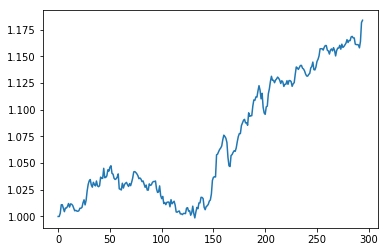

In [329]:
plt.plot(records)

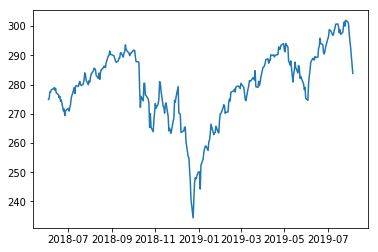

In [330]:
plt.plot(SPY.copy()[5:300]["Close"])